### Summary

- Generate a dataset from Reddit API 
- Discover underlying clusters using unsupervised learning tools (clustering, dimensionality reduction, pre-trained word embeddings, network embedding, etc.)
- Produce a visualization in 2d or 3d of the data (using dimensionality reduction) with the clusters found.

In [1]:
# import Python Reddit API Wrapper (PRAW)
import praw

In [2]:
reddit = praw.Reddit(client_id='my client id',
                     client_secret='my client secret',
                     user_agent = 'cluster analysis'
                     )

In [3]:
subreddit_ds = reddit.subreddit("datascience")

for submission in reddit.subreddit('datascience').hot(limit=5):
    print(submission.title)

Weekly Entering & Transitioning - Thread 07 Aug, 2023 - 14 Aug, 2023
How to learn as a full time employee?
Algorithmic Marketing Books
Is my internship worthless?
Would you switch to DA from DS?


In [4]:
# extract data from reddit
content = []
for post in subreddit_ds.hot(limit=1000):
    submission_content = post.title + " " + post.selftext    # join title and the body of the post into one string
    content.append(submission_content)

In [5]:
# create dataframe with all the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set

df = pd.DataFrame({'posts': content})

# number of posts
print(df.shape)

df.head()

(962, 1)


,posts
0,Weekly Entering & Transitioning - Thread 07 Au...
1,How to learn as a full time employee? My curre...
2,"Algorithmic Marketing Books Hello, fellow Data..."
3,Is my internship worthless? I accepted an inte...
4,Would you switch to DA from DS? Like in the to...


In [6]:
print(df['posts'].iloc[1])

How to learn as a full time employee? My current company hired me as a data scientist and they said you will have to learn required skills on the go through mini projects.

I'm assigned to a demand forecasting project.
How can I learn and proceed further given I'm unaware of majority of concepts and learn on the go ?

Basically I find it quite daunting to find what must be correct path forward given a certain problem.

I know python, pandas and very basic stuff but am unware of majority of concepts.


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [8]:
# feature extraction using tf-idf vectorizer
tf_model = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english', max_features=10000)
X = tf_model.fit_transform(df['posts'])

In [9]:
# visualize the words in the corpus
features = tf_model.get_feature_names_out() # get the words
tokens = pd.DataFrame(X.toarray(), columns = features)
tokens.head()

,000,01,07,10,100,1000,100k,10k,11,12,...,yesterday,yield,yoe,young,youtu,youtube,yr,yrs,zero,zone
0,0.0,0.0,0.099768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.103265,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192974,0.000000,0.0


**Non-negative Matrix Factorization (NMF)** is a popular technique for document topic modeling, which involves discovering latent topics within a collection of documents.

In [10]:
nmf = NMF(n_components=4, random_state=0)
nmf.fit(X)

topics = [] # topic list that will be used later for plotting
# for each topic/component, print the top 10 words
for index,word in enumerate(nmf.components_):
    top10 = [features[i] for i in word.argsort()[-10:][::-1]] # list of top 10 words for each topic
    topics.append(top10)
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print(top10)
    print('\n')


THE TOP 10 WORDS FOR TOPIC #0
['job', 'work', 'experience', 'ds', 'years', 'analyst', 'like', 'company', 've', 'just']


THE TOP 10 WORDS FOR TOPIC #1
['learning', 'use', 'model', 'ai', 'data', 'machine', 'python', 'using', 'project', 'time']


THE TOP 10 WORDS FOR TOPIC #2
['science', 'data', 'career', 'degree', 'masters', 'computer', 'scientist', 'engineering', 'scientists', 'courses']


THE TOP 10 WORDS FOR TOPIC #3
['png', 'https', 'auto', 'redd', 'width', 'webp', 'preview', 'format', 'com', 'x200b']




In [11]:
# create topic column and add to the dataframe
topic_results = nmf.transform(X) # numpy array, each row represent the list of coefficients for each topic for that post
df['Topic'] = topic_results.argmax(axis=1) # choose the topic with the highest coefficient for each post
df.head()

,posts,Topic
0,Weekly Entering & Transitioning - Thread 07 Au...,3
1,How to learn as a full time employee? My curre...,1
2,"Algorithmic Marketing Books Hello, fellow Data...",1
3,Is my internship worthless? I accepted an inte...,0
4,Would you switch to DA from DS? Like in the to...,0


In [12]:
# print out an entry from the dataset by chosen topic number
for i in range(4):
    print(f"topic {i}: {topics[i]}\n")
    print(df[df['Topic']== i]['posts'].sample(1).values)
    print("\n")

# images posted on reddit have a link starting as https://preview.redd.it

topic 0: ['job', 'work', 'experience', 'ds', 'years', 'analyst', 'like', 'company', 've', 'just']

["Need advice on things to learn/do before graduating next year Currently wondering what my next steps should be in order to have a higher chance of securing a good data analyst / data science job when I graduate next year. I have essentialy 11 months of free time and wonder what the best use of my time will be. I am scared since the job market is tough right now and people a lot more qualified than me are struggling to even find entry level jobs.\r  \n\r  \nBackground:\r  \n\r  \nIn California\r  \n\r  \nGraduated with a Bachelor's in Mathematics from a T30 University\n\nCurrently enrolled in Master's of Informatics program from a well known state school (Will graduate in 11 months)\r  \r  \nCurrently working in a chill job as a Data Coordinator for 2 years: Mainly an inventory management role with small bits of dashboarding via Excel and SAP, so I have a bunch of free time to study.\r  

In [13]:
# prepare for t-SNE visualizaiton
from sklearn import manifold

model = manifold.TSNE(n_components=2, perplexity=30.0, init='random', random_state=0)
X_transformed = model.fit_transform(X)

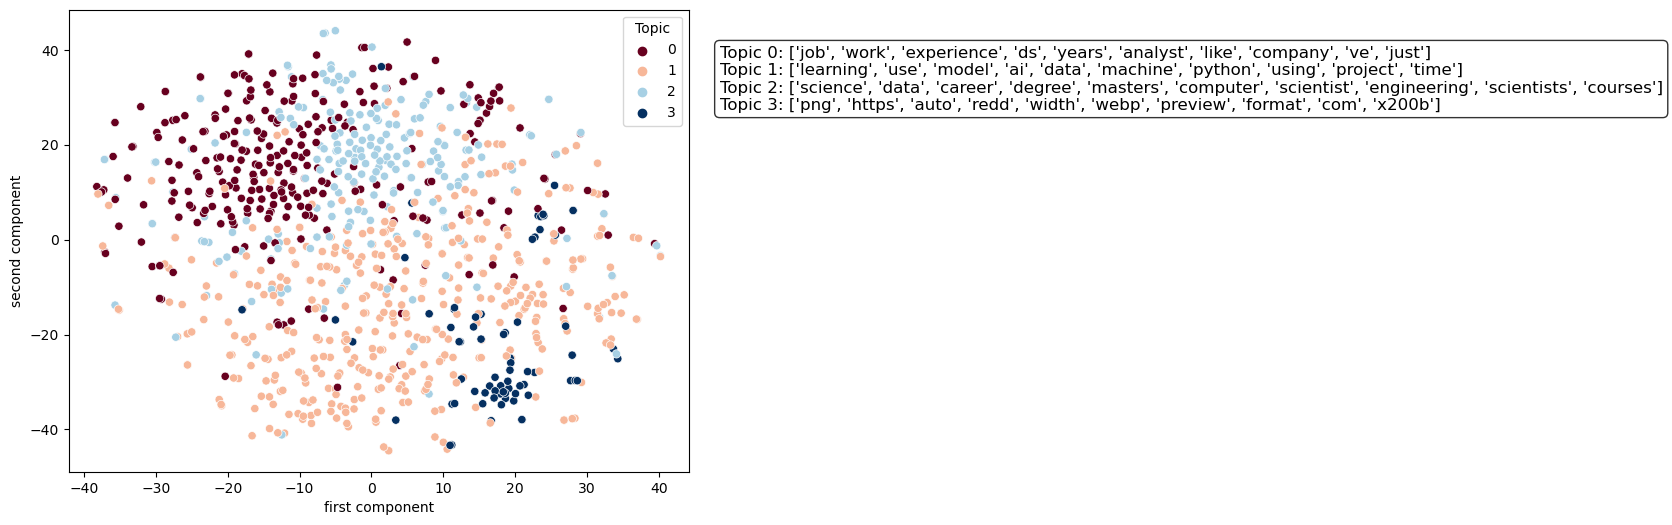

In [14]:
# visualization of the topic clusters

plt.figure(figsize=(8,6))
sns.scatterplot(x= X_transformed[:,0], y= X_transformed[:,1], hue=df['Topic'], palette='RdBu')
plt.xlabel('first component')
plt.ylabel('second component')
# Add a text box
text_box_content = {}
for i, topic in enumerate(topics):
    text_box_content[f'Topic {i}'] = topic
ax = plt.gca()
text_box = plt.text(
    1.05, 0.85,
    '\n'.join([f'{topic}: {explanation}' for topic, explanation in text_box_content.items()]),
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment='center',
    bbox={'boxstyle': 'round', 'facecolor': 'white', 'alpha': 0.8}
)
plt.show()